In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# 0 - 레드와인, 1 - 화이트와인

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
wine_data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split (
    wine_data, wine_target, test_size=0.2, random_state=42
)

In [9]:
from sklearn.tree import DecisionTreeClassifier  # 결정 트리 분류기

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
print("훈련세트:", dt.score(train_input, train_target))
print("테스트세트:", dt.score(test_input, test_target))

훈련세트: 0.996921300750433
테스트세트: 0.8584615384615385


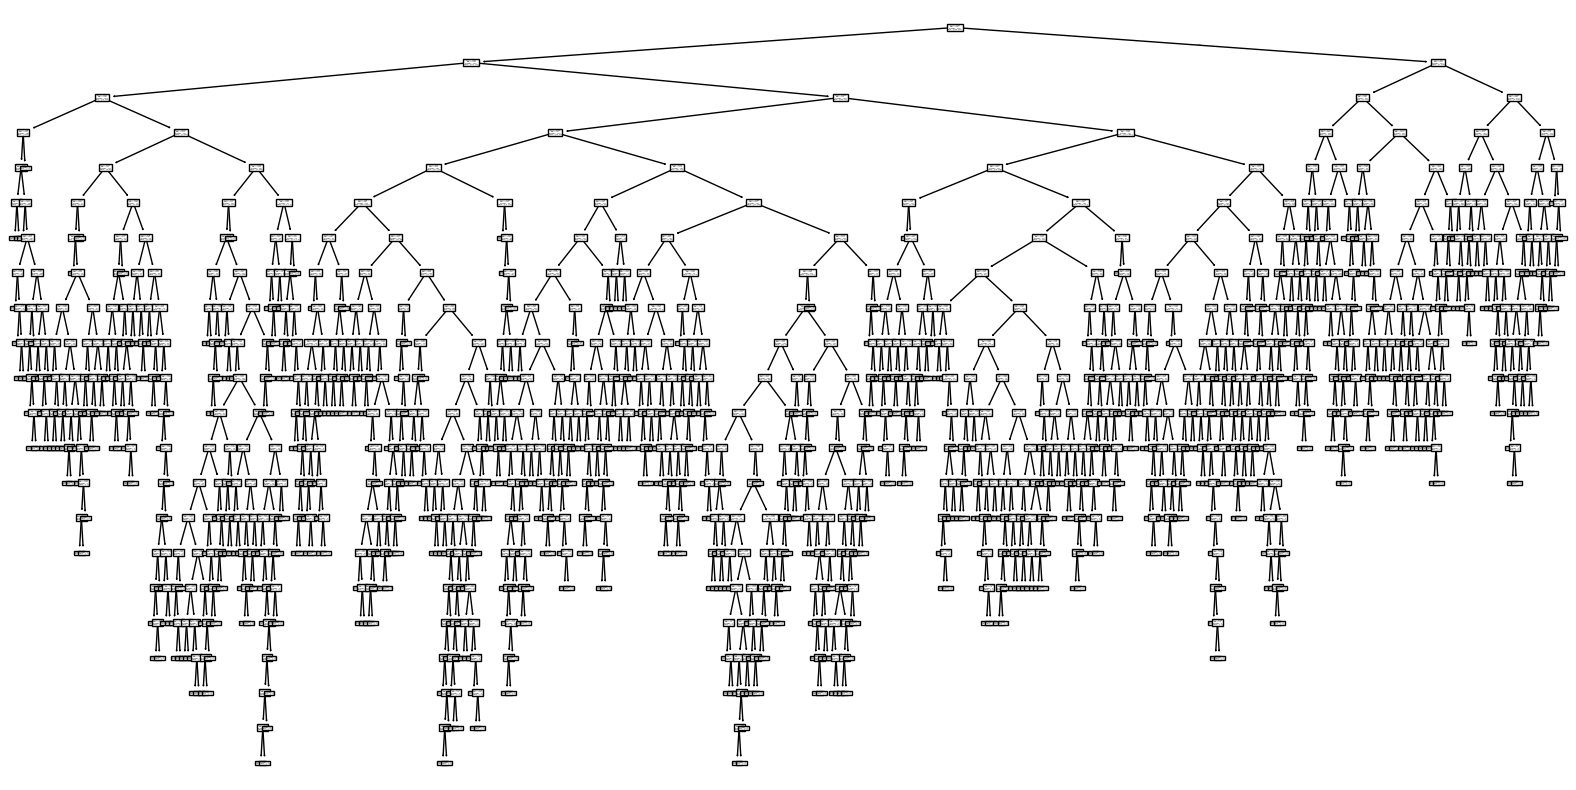

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt)
plt.show()

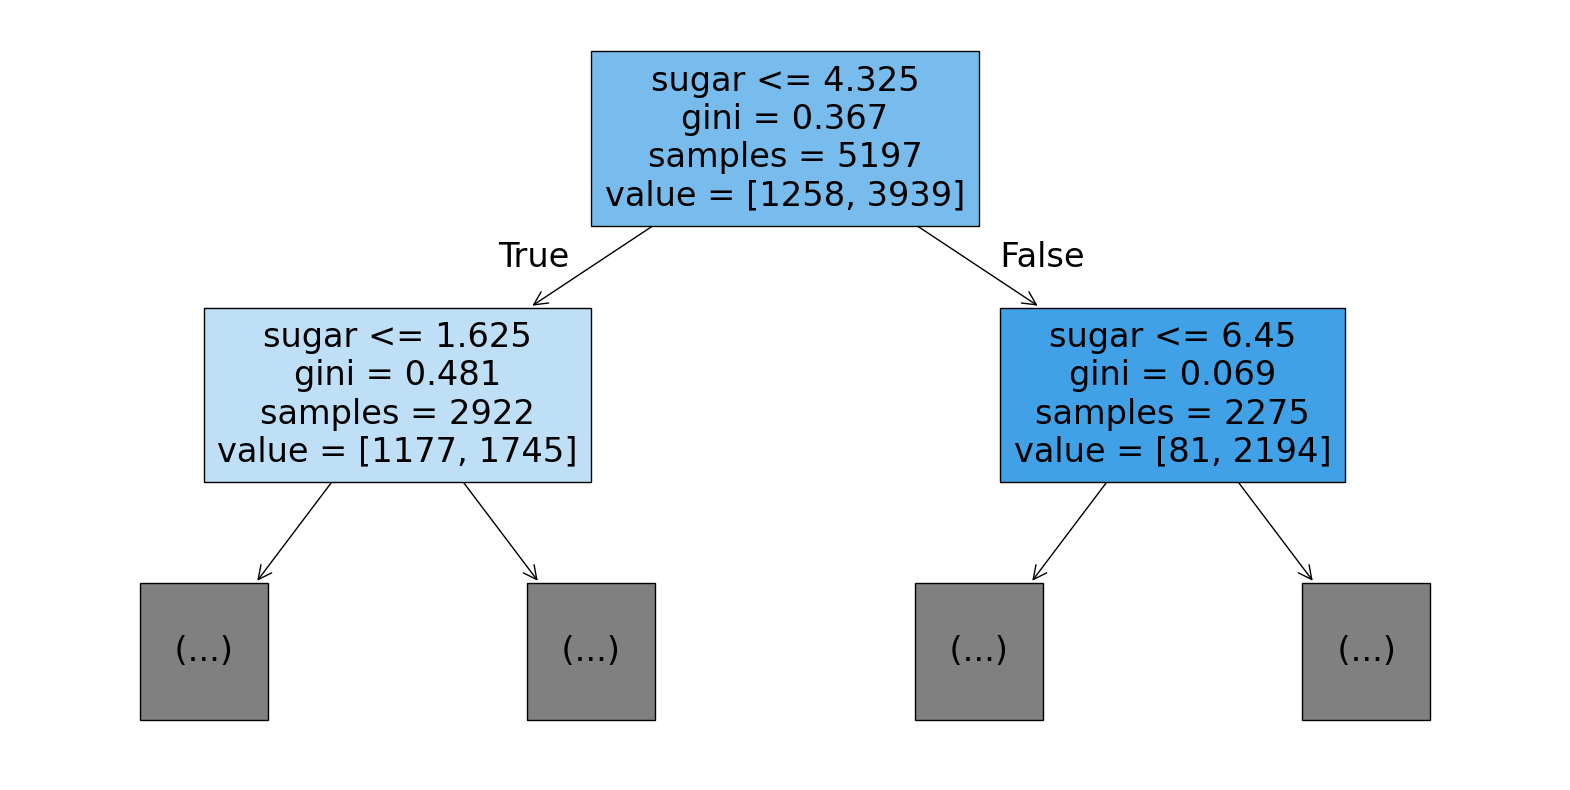

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
# 노드의 성장을 막는 방법 - 가지치기 / 과대적합을 막고, 보다 일반적인 모델로 학습 가능
# max_depth

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print("훈련세트:", dt.score(train_input, train_target))
print("테스트세트:", dt.score(test_input, test_target))

훈련세트: 0.8454877814123533
테스트세트: 0.8415384615384616


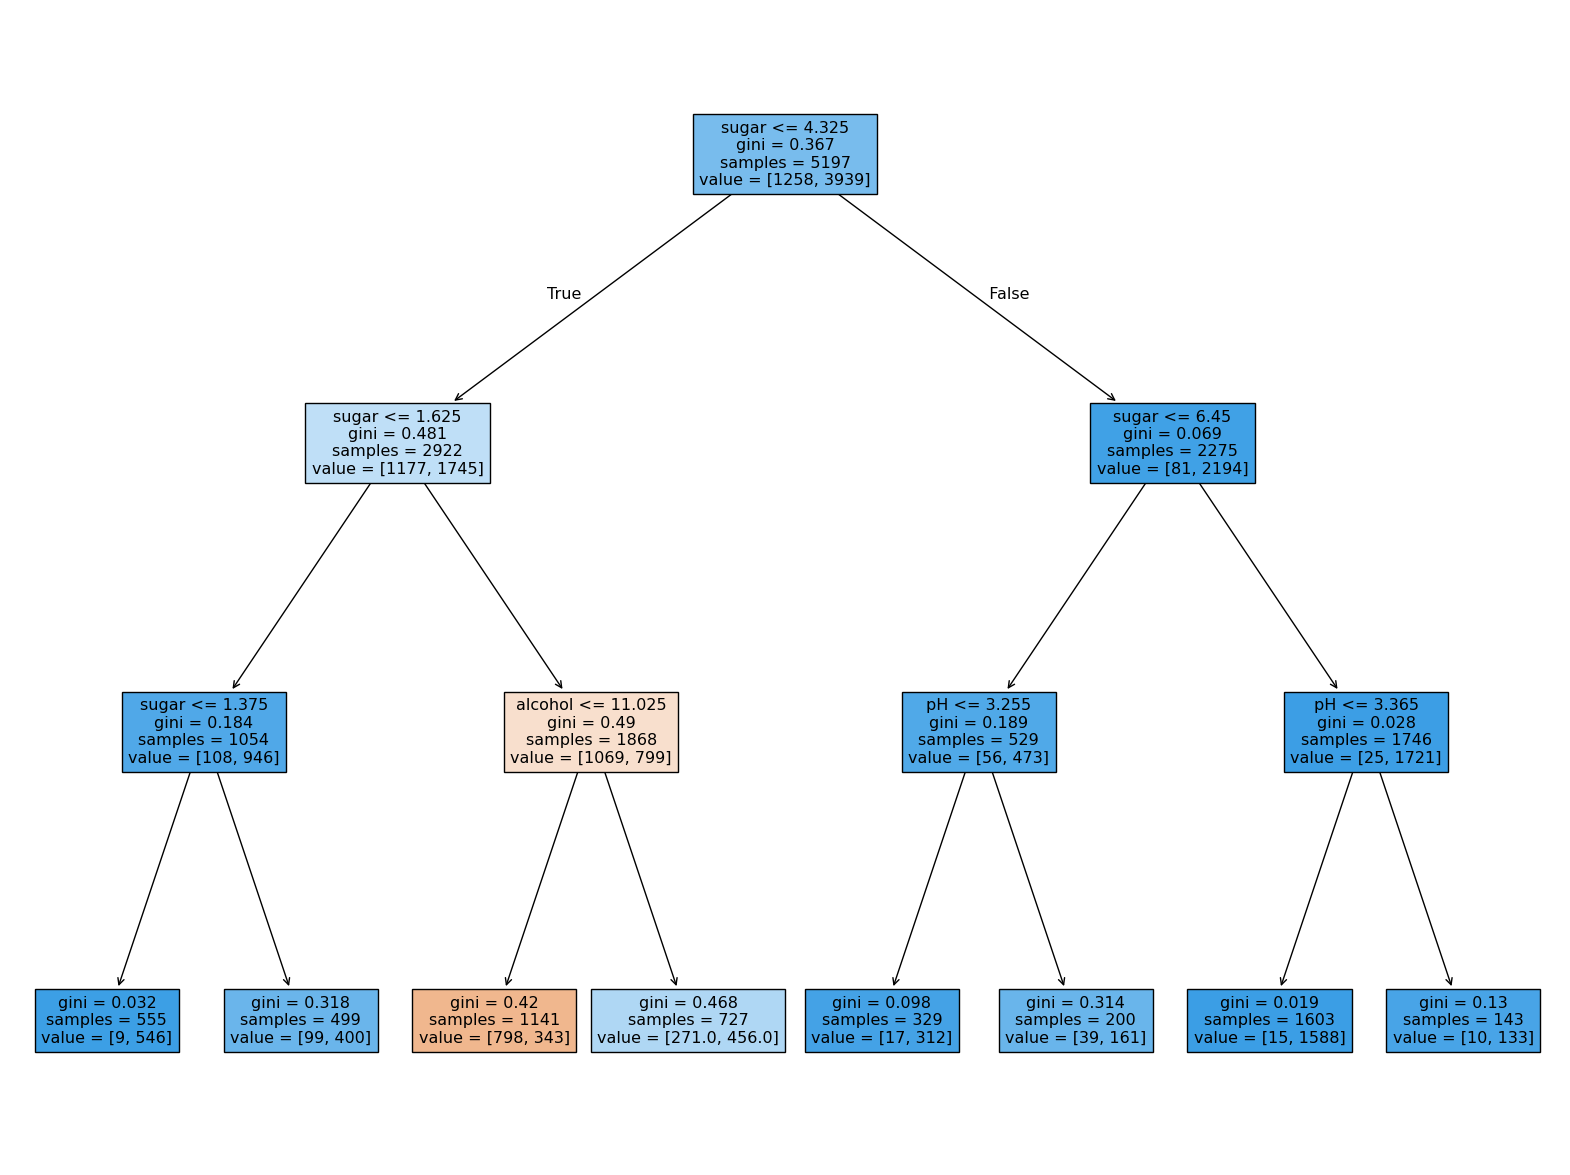

In [18]:
# GridSearch 

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [20]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00201058, 0.00199747, 0.00199962, 0.00199842, 0.00203967]), 'score_time': array([0.00098562, 0.00099993, 0.00100303, 0.        , 0.00099087]), 'test_score': array([0.84230769, 0.83365385, 0.84504331, 0.8373436 , 0.8479307 ])}


In [21]:
import numpy as np

print(np.mean(scores['test_score']))

0.8412558303102096


In [25]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [26]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

dt = gs.best_estimator_

print("훈련세트:", dt.score(train_input, train_target))
print("테스트세트:", dt.score(test_input, test_target))

훈련세트: 0.8928227823744468
테스트세트: 0.86


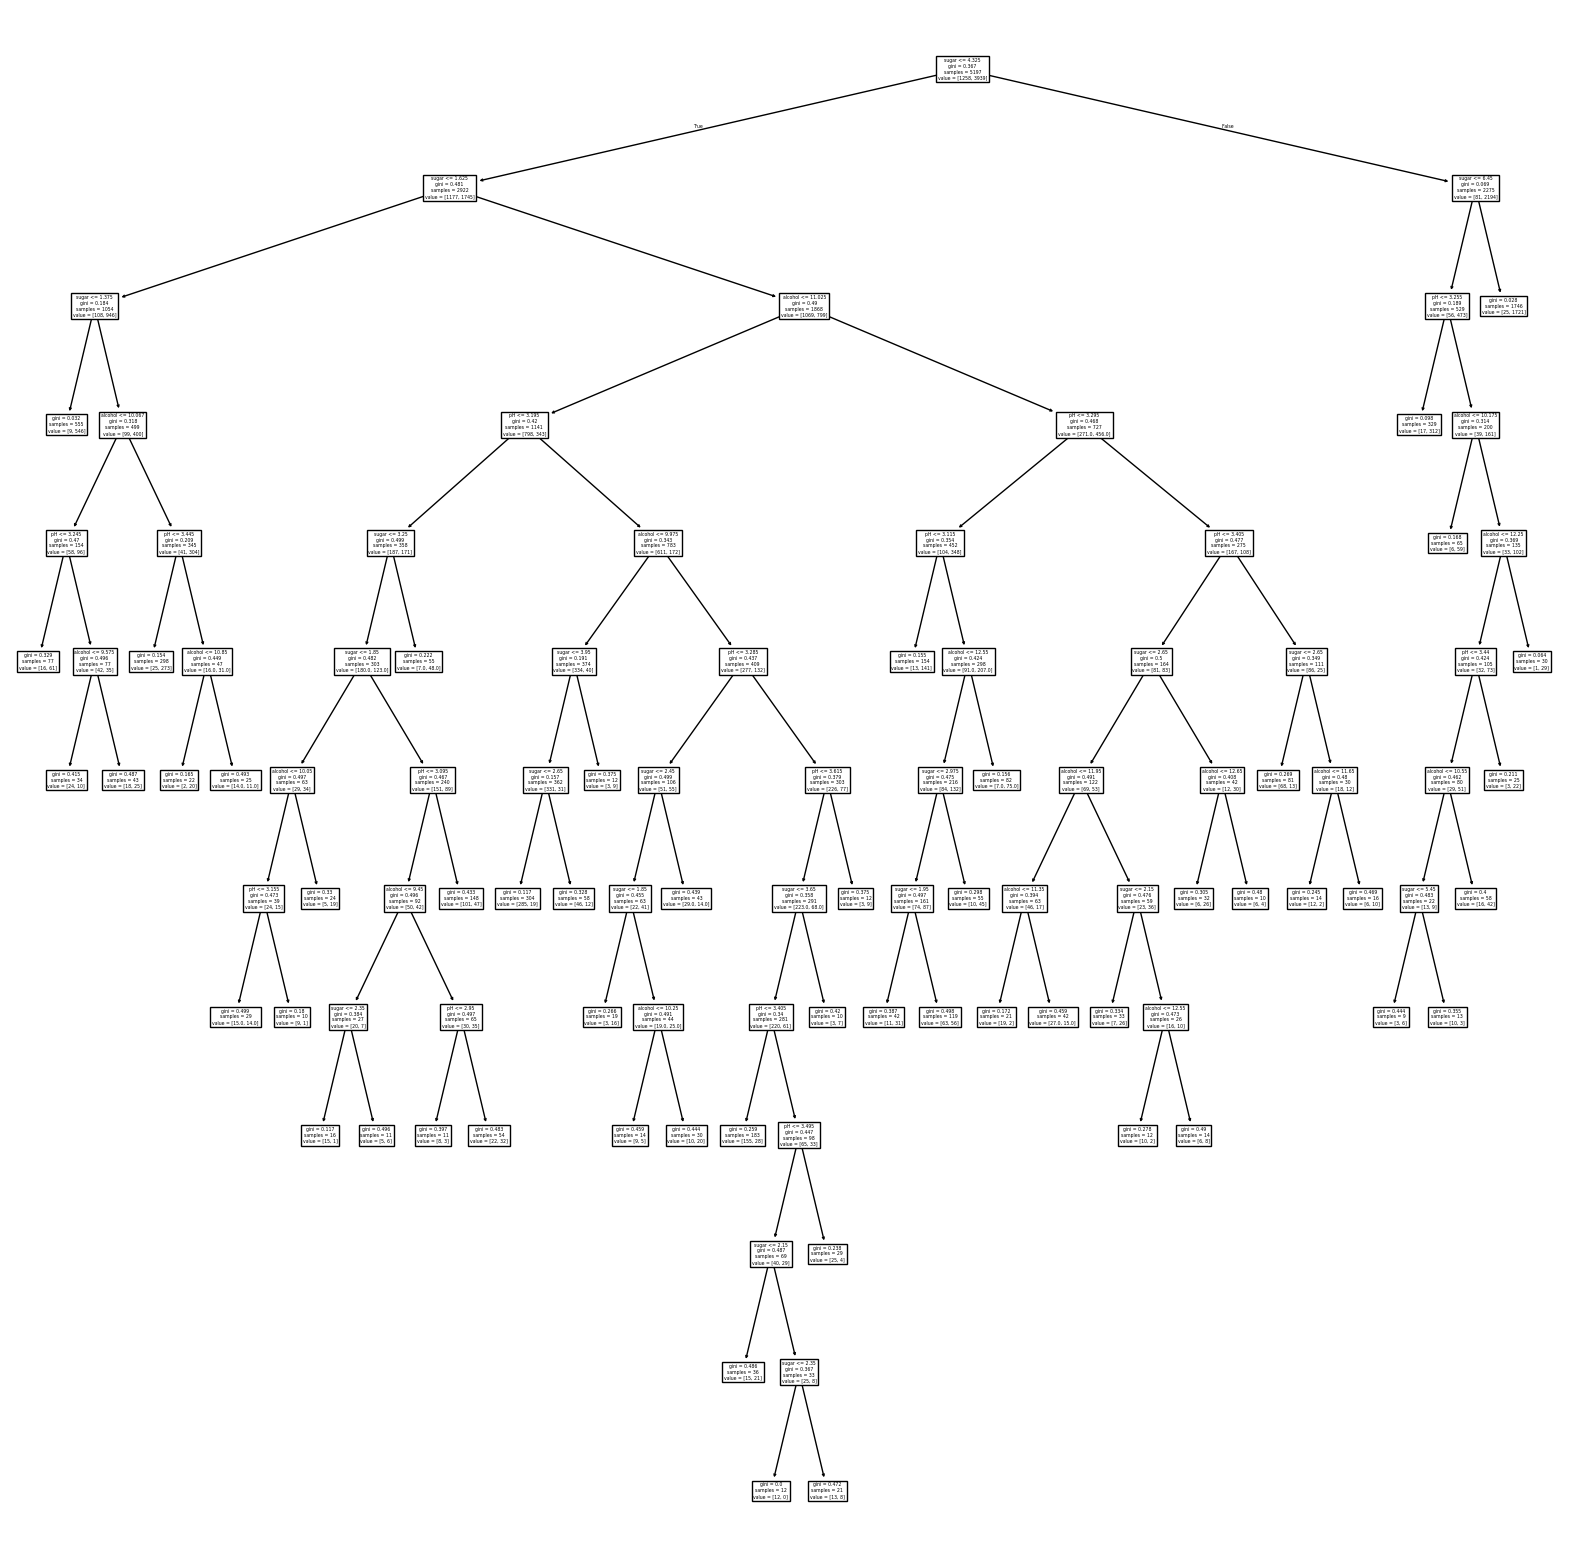

In [27]:
plt.figure(figsize=(20, 20))
plot_tree(dt, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()